<a href="https://colab.research.google.com/github/KIMDOKYOUNG/DeepLearning/blob/master/chapter4/chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 밑바닥부터 시작하는 딥러닝 1 뽀개기
#### CHAPTER 4 신경망 학습  
#### 일자 : 2020-08-14
#### 최종 수정일 : 2020-08-18

- 데이터로부터 매개변수 정하기 
- end to end mechine learning = 딥러닝 => 데이터(입력)에서 목표한 결과(출력)을 얻는다는 뜻 
- train 데이터와, test 데이터로 나눠서 진행한다.
- 한 데이터 셋에만 지나치게 최적화 된 상태 -> 오버피팅! 오버피팅을 피해야 된다. 
- 손실함수(loss function)을 기준으로 최적의 매개변수 값을 탐색한다.
  - 평균 제곱 오차
  - 교차 엔트로피 오차 

### 평균 제곱 오차 

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y,t):
  return 0.5*np.sum((y-t)**2)

In [3]:
t = [0,1,0,0,0,0,0,0,0,0]
y = [0.2,0.05, 0.1,0.2,0.3,0.1,0.3,0.7,0.1,0.01]

print(mean_squared_error(np.array(y),np.array(t)))

t = [0,0,0,0,0,0,0,1,0,0]
y = [0.2,0.05, 0.1,0.2,0.3,0.1,0.3,0.7,0.1,0.01]

print(mean_squared_error(np.array(y),np.array(t)))

0.8412999999999999
0.19130000000000003


값이 작을수록 정답에 가깝다.

### 교차 엔트로피 오차 

In [4]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return - np.sum(t*np.log(y + delta)) # 마이너스 무한대가 발생하지 않도록 작은 값을 더한다.

In [5]:
t = [0,1,0,0,0,0,0,0,0,0]
y = [0.2,0.5, 0.1,0.2,0.3,0.1,0.3,0.3,0.1,0.01]

print(cross_entropy_error(np.array(y),np.array(t)))

y = [0.2,0.05, 0.1,0.2,0.3,0.1,0.3,0.7,0.1,0.01]

print(cross_entropy_error(np.array(y),np.array(t)))

0.6931469805599654
2.9957302735559908


In [35]:
### 미니 배치 
from mnist import load_mnist

(x_train, t_train), (x_test,t_test) = load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [37]:
# 무작위로 10장 뽑아내기 
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train_size인 0~60000 미만 10개 숫자 뽑기 
print(batch_mask)


[55 15 75  7 89 41 95 20 17 27]


In [43]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

- 배치용 쿄차 엔트로피 오차 구현하기 
  -  배치 사이즈 만큼을 한꺼번에 계산을 하는거니깐 배치 사이즈 만큼 나눠주면 된다. 
  

In [65]:
a = np.array([1,2,3,4])
b = np.array([0,0,0,1])
y = a.reshape(1,-1)
x = b.reshape(1,-1)
c = np.array([[1,2,3,4],[2,3,4,5]])

print(a)
print(y)
print(x)
print(a.shape)
print(y.shape)
print(c.shape)

[1 2 3 4]
[[1 2 3 4]]
[[0 0 0 1]]
(4,)
(1, 4)
(2, 4)


In [61]:
np.sum(b*np.log(c))

2.995732273553991

In [98]:
def cross_entropy_error1(y,t):
  delta = 1e-7 # 작은 값을 더해줘서 언더플로우를 방지 
  # 배치사이즈로 나눠주려고한다. 배치사이즈를 y.shape[0]으로 구하려고 한다. 그런데 만약에 데이터가 하나인경우 y.shape[0]을 하면 원소개수가 나오므로 shape을 (1,-1)로 바꿔줘야된다. 
  # (1,-1) 여기서 -1로 두는 이유는 알아서 맞춰두라는 뜻 만약 (4,)였으면 (1,4)로 잘 바뀌는 것을 볼 수 있다. 
  if y.ndim == 1:
    y = y.reshape(1,-1)
    t = t.reshape(1,-1)
  
  batch_size = y.shape[0]
  return -np.sum(t*np.log(y+delta)) / batch_size

- 만약에 정답레이블이 원핫인코딩이 아니라 2,6과 같은 숫자이면 각 레이블에 해당하는 신경망의 출력을 추출하면된다. 
- 어떻게 이게 가능한가?
  - 원핫인코딩 되어 있는 t와 y를 곱한다면 정답만 1이고 나머지 부분은 0이기 때문에 t와 y를 곱하면 정답인 부분의 신경망 값만 남게 된다. 그니깐 위의 가정이 적용될 수 있다. 
  - 아래의 예시를 확인 해 보자! 

In [106]:
y = np.array([[1,2,3,4],[2,3,3,4],[3,4,5,6]])
t = [1,3,3]
t_2 = np.array([[0,1,0,0],[0,0,0,1],[0,0,0,1]])

In [107]:
result1 = y[np.array([0,1,2]),t]
print(result1)

[2 4 6]


In [108]:
result2 = y*t_2
print(result2)

[[0 2 0 0]
 [0 0 0 4]
 [0 0 0 6]]


In [92]:
# 단순히 더하기만 했을때 결과가 같게 나오는 것을 확인 할 수 있다. 
print(np.sum(result1))
print(np.sum(result2))

12
12


In [99]:
def cross_entropy_error2(y,t):
  delta = 1e-7
  if y.ndim == 1:
    y = y.reshape(1,-1)
    t = t.reshape(1,-1)
  
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t]+delta)) / batch_size

In [105]:
cross_entropy_error1(y,t_2)

-1.290400367524852

In [109]:
cross_entropy_error2(y,t)

-1.290400367524852

원핫인코딩이 아닌 레이블이 들어가도 결과는 같게 나오는 것을 볼 수 있다.

---
## 왜 손실함수를 사용해야 할까?

신경망 학습에서 최적의 매개변수(가중치와 편향)를 탐색 할 때 손실함수 값을 최대한 작게하는 매개변수 값을 찾는다. 이때 매개변수의 미분(기울기)를 계산하고, 그 미분값을 토대로 매개변수의 값을 갱신해 나가는 과정을 반복한다. 


- 정확도를 지표로 삼으면 대부분 미분값이 0이 된다. 
- 정확도는 매개변수를 바꿨을때 미미하게 보이는 차이가 잘 들어나지 않기 때문이다. 
  - 매개변수를 미미하게 바꿨을 경우에는 반응이 거의 없고, 반응이 있으면 갑자가 확 변화를 한다. 
  - 이걸 계단 함수를 활성화 함수로 사용했을 경우와 같게 본다. 
  - 계단 함수는 대부분의 경우 미분값이 0이다. 그러니 손실함수의 지표로 삼는게 의미가 없어진다. 
- 손실함수를 지표로 삼으면 미미하게 바꿨을 경우에도 변화가 들어나고, 연속적으로 변화한다. 
- 그래서 시그모이드 함수의 미분은 어느 곳이든 기울기가 0이 되지 않아서 신경망이 올바르게 학습할 수 있는 것이다. 
- 활성화 함수로 계단 함수를 사용하지 않고 시그모이드와 같은 함수를 사용하는 것 


### 수치 미분 
- 한 순간의 변화량 
- 수치 미분 : 아주 작은 차분으로 미분을 하는 것 

In [110]:
### 나쁜 구현의 예 :  10e-50과 같이 너무 작은 값을 사용하면 0.0이 되서 문제가 된다. 
def numerical_diff(f,x):
  h = 10e-50
  return (f(x+h)-f(x)) / h

- 진정한 미분 : x에 대해 미분하는 것 
- 근사로 구한 미분 : (x+h)와 x 사이의 기울기 

이 둘이 완전히 일치하지 않아서 수치 미분에 오차가 포함되어 있다고 하는 것이다. 



In [111]:
### 좋은 구현 : 수치 미분에는 오차가 포함되기 때문에 중심 차분(중앙 차분)을 하는 것 
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h)-f(x-h)) / (2*h)

In [9]:
def function_1(x):
  return 0.01*x**2 +0.1*x

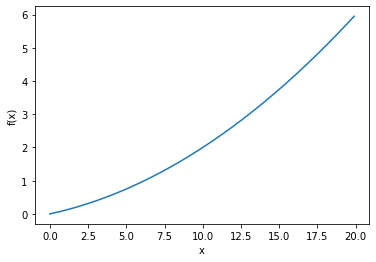

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [11]:
numerical_diff(function_1,5)

0.1999999999990898

In [12]:
numerical_diff(function_1,10)

0.2999999999986347

x가 5와 10일때 미분이 0.2와 0.3으로 오차가 매우 작다 

### 편미분 : 변수가 여러개인 함수에 대한 미분 

In [13]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

In [14]:
## x0 = 3, x1 = 4일때, x0에 대한 편미분 구하는 함수 

def function_tmp1(x0):
  return x0*x0 + 4.0**2

In [15]:
## x0 = 3, x1 = 4일때, x1에 대한 편미분 구하는 함수 

def function_tmp2(x1):
  return 3.0**2 + x1*x1

### 기울기 
- 모든 변수의 편미분을 백터화 한 것 
- 각 변수들의 grad를 넣을 수 있게 x와 shape이 같은 배열 생성하는 것이 포인트~~



In [16]:
def _numerical_gradient_no_batch(f,x):

  h = 1e-4
  grad = np.zeros_like(x) # 여기에 각 변수들의 grad를 넣을 수 있게 x와 shape이 같은 배열 생성 

  for idx in range(x.size):
    temp = x[idx]
    x[idx] = float(temp) + h
    fxh1 = f(x)
    x[idx] = temp -h 
    fxh2 = f(x)
    grad[idx] = (fxh1-fxh2)/ (2*h)
    x[idx] = temp
  
  return grad 



In [17]:
def numerical_gradient(f,X):
  if X.ndim == 1:
    return _numerical_gradient_no_batch(f,X)
  else : 
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = _numerical_gradient_no_batch(f,x)
    
    return grad

In [18]:
# 참고 
np.array([1,2,3,4]).size

4

In [19]:
from mpl_toolkits.mplot3d import Axes3D

No handles with labels found to put in legend.


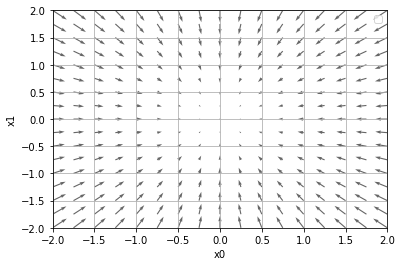

In [20]:
x0 = np.arange(-2,2.5,0.25)
x1 = np.arange(-2,2.5,0.25)
X,Y = np.meshgrid(x0,x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X,Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()


- 화살표들이 기울기가 가장 낮은 곳을 가르키는 것을 볼 수 있다. 
- 기울기는 각 지점에서 낮아지는 방향을 가르킨다. => 기울기가 가르키는 쪽이 각 장소에서 함수의 출력 값을 가장 줄이는 방향 

### 경사하강법 

- 기울기를 이용해서 함수의 최솟값을 찾으려는 것이 경사법이다.
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한 뒤 다시 기울기를 구하고, 또 그 기울어진 방향으로 움직이는 것 

- 갱신하는 양은 학습률(learning rate)가 결정한다. 
  - 너무 크면 발산하고, 너무 작으면 학습 속도가 너무 늦다. 
- 학습률이 곱해진 기울기를 원래 함수에서 빼므로 경사 "하강법"이다.


In [21]:
def gradient_descent(f, init_x, lr = 0.01, step_num =100):
  x = init_x
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= grad*lr
  return x  

In [22]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [114]:
def gradient_descent(f, init_x, lr = 0.01, step_num =100):
  x = init_x
  x_history = [] # x가 바뀌어가는 것을 보기위해서 리스트에 저장 
  for i in range(step_num):
    x_history.append(x.copy())
    grad = numerical_gradient(f,x)
    x -= grad*lr
  return x , np.array(x_history)

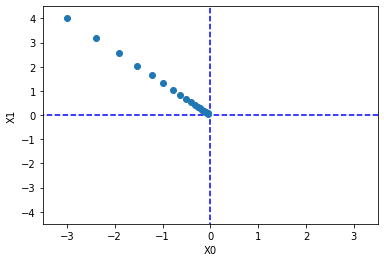

In [24]:
init_x = np.array([-3.0,4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

값이 가장 낮은 장소인 원점에 점점 가까워지는 것을 볼 수 있다!

In [25]:
init_x = np.array([-3.0,4.0])
lr = 10
step_num = 20
gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12]]))

In [26]:
init_x = np.array([-3.0,4.0])
lr = 1e-10
step_num = 20
gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

(array([-2.99999999,  3.99999998]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998]]))

주의 할 부분은 학습률이 너무 크면 큰 값으로 발산하고, 너무 작으면 움직임이 거의 없이 (갱신이 되지 않고) 끝난다. 
- 하이퍼파라미터 : 학습률 같은 매개변수, 사람이 집적 정해줘야 된다. 

### 신경망에서의 기울기

In [27]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


In [28]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [29]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)

  def predict(self,x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)

    return loss

In [30]:
net = simpleNet()
print(net.W)

[[ 0.48614461  0.02419955  0.03584698]
 [-0.20714932  0.47172567  0.04298632]]


In [32]:
x = np.array([0.6,0.9])

p = net.predict(x)
print(p)
print(np.sum(p))



t = np.array([0,0,1]) # 정답 레이블 

net.loss(x,t)

[0.10525238 0.43907284 0.06019587]
0.6045210904139686


1.2546837106146185